In [1]:
import re, json, requests
import pandas as pd
import math

In [2]:
url = 'https://raw.githubusercontent.com/rohitashwachaks/Social-Media-Influencer-analysis/main/Twitter-Influencers/F1_DataBase/f1_tweets.json'

In [3]:
# Online
# resp = requests.get(url)
# resp_parsed = re.sub(r'^jsonp\d+\(|\)\s+$', '', resp.text)
# data = json.loads(resp_parsed)

# From File
data = json.load(open('./F1_DataBase/f1_tweets.json', 'r'))
print(len(data))
data[0]

5000


{'created_at': 'Wed Feb 09 20:17:20 +0000 2022',
 'id': 1491506524690210817,
 'id_str': '1491506524690210817',
 'text': '@martinleblanc This made me laugh\n\nhttps://t.co/YMeAn75TIT',
 'display_text_range': [15, 58],
 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
 'truncated': False,
 'in_reply_to_status_id': 1491505262485725185,
 'in_reply_to_status_id_str': '1491505262485725185',
 'in_reply_to_user_id': 821128692,
 'in_reply_to_user_id_str': '821128692',
 'in_reply_to_screen_name': 'martinleblanc',
 'user': {'id': 274625097,
  'id_str': '274625097',
  'name': 'James McKinven',
  'screen_name': 'jmckinven',
  'location': 'Canterbury, England',
  'url': 'https://jamesmckinven.com',
  'description': 'I speak to indie founders about how they’ve built their profitable business on @indiebitespod & @nomoremondaysfm. Made @whitstablecraft. Blog at https://t.co/jYDXPonaCY 🚀',
  'translator_type': 'none',
  'protected': False,
  'verified': Fal

In [4]:
data = pd.DataFrame(data)

In [5]:
data.columns

Index(['created_at', 'id', 'id_str', 'text', 'display_text_range', 'source',
       'truncated', 'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'quoted_status_id', 'quoted_status_id_str',
       'quoted_status', 'quoted_status_permalink', 'is_quote_status',
       'quote_count', 'reply_count', 'retweet_count', 'favorite_count',
       'entities', 'favorited', 'retweeted', 'possibly_sensitive',
       'filter_level', 'lang', 'timestamp_ms', 'extended_tweet',
       'retweeted_status', 'extended_entities'],
      dtype='object')

In [6]:
data.in_reply_to_screen_name[3]

'dami_willis'

In [7]:
type(data.retweeted_status[1]) == dict

False

In [8]:
# data.retweeted_status[3].get('user').get('screen_name')

In [9]:
data.entities[3].get('user_mentions')[0].get('screen_name')

'dami_willis'

In [10]:
data.user[1].get('screen_name')

'RnbRnb7'

In [11]:
user_provide = []
user_receive = []
attention_type = []

In [12]:
for i in range(len(data)):
    
   #reply
    if data.in_reply_to_screen_name[i] != None:
        user_provide.append(data.user[i].get('screen_name'))
        user_receive.append(data.in_reply_to_screen_name[i])
        attention_type.append('reply')
    
    #retweet
    if type(data.retweeted_status[i]) == dict:
        user_provide.append(data.user[i].get('screen_name'))
        user_receive.append(data.retweeted_status[i].get('user').get('screen_name'))
        attention_type.append('RT')
    
    #mention
    if len(data.entities[i].get('user_mentions'))!=0:
        for j in range(len(data.entities[i].get('user_mentions'))):
            user_provide.append(data.user[i].get('screen_name'))
            user_receive.append(data.entities[i].get('user_mentions')[j].get('screen_name'))
            attention_type.append('mention')
        
    # for future/project scope?
    #text/tweet-content?
    #urls?
        

In [19]:
network_data = pd.DataFrame({'user_provide':user_provide,'user_receive':user_receive,'attention_type':attention_type})
n = pd.DataFrame(network_data[['user_provide','user_receive','attention_type']].groupby(['user_provide','user_receive'])['attention_type'].agg('count'))
n.to_csv('./F1_DataBase/f1_network_links.csv')
n

attention_type
user_provide   user_receive                   
005Markus      F1FeederSeries1               2
               joshrevellyt                  1
0dd8all        F1                            1
               F1_Jordan                     2
100yontori     redbullracing                 2
...                                        ...
zippitydodah51 redbullracing                 1
ziptron        AlbaneseLaura                 2
zoomdigitaltv  redbullracing                 2
zugspitze2964  PMZF1                         2
               stefxnrhys                    1

[6980 rows x 1 columns]

In [28]:
participants = {}
for i in set(network_data.user_provide).union(set(network_data.user_receive)):
    participants[i] = 1
participants = pd.Series(participants)
participants.to_csv('./F1_DataBase/f1_network_participants.csv')
participants

Ajessop            1
SteveHamill_       1
adamlambert        1
JamesPr05247764    1
brocedes           1
                  ..
CFCZaLeX           1
Rinanovakfan       1
zamobed            1
CryptoJugal        1
Jarviik            1
Length: 3910, dtype: int64

In [15]:
n = pd.crosstab(network_data.user_provide, network_data.user_receive)
idx = n.columns.union(n.index)
n = n.reindex(index = idx, columns=idx, fill_value=0)
n.to_csv('./F1_DataBase/f1_network_adjacency.csv')

In [16]:
import networkx as nx 
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


In [17]:
G = nx.DiGraph(directed=True)

In [18]:
# (network_data.user_provide+network_data.user_receive).unique()

In [19]:
# tuple(zip(network_data.user_provide,network_data.user_receive))

In [20]:
G.add_nodes_from((network_data.user_provide+network_data.user_receive).unique())
G.add_edges_from(tuple(zip(network_data.user_provide,network_data.user_receive)))

In [21]:
# nx.draw(G, with_labels=True)
figure(figsize=(20, 20))
nx.draw(G, with_labels=False)
plt.show() 

In [ ]:
centrality = nx.degree_centrality(G)
df = pd.DataFrame(centrality, index = centrality.keys())
df

,freebiejumperMODPizza,mssummer444Millions,mssummer444PapaJohnsUK,oreostansstuffKeystoneLightUS,twirlyswirl79IFM_Insurance,twirlyswirl79PizzaExpress,EDArtsAndDesignlittlecaesars,LiliL666m1313ColeTheBlackCat,oreostansstuffpeeweeherman,oreostansstuffGKIDSfilms,...,PopUpPizzaLV,HLHPattison,SonderQuest,childe_dirk,marvincsc,1masterofnight,d_k_411,DIEGOAMR18,shemjay93,FahzTheGorilla
freebiejumperMODPizza,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000091,0.000091,0.000091,0.000091,0.000091,0.000091,0.000091,0.000091,0.000091,0.000091
mssummer444Millions,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000091,0.000091,0.000091,0.000091,0.000091,0.000091,0.000091,0.000091,0.000091,0.000091
mssummer444PapaJohnsUK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000091,0.000091,0.000091,0.000091,0.000091,0.000091,0.000091,0.000091,0.000091,0.000091
oreostansstuffKeystoneLightUS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000091,0.000091,0.000091,0.000091,0.000091,0.000091,0.000091,0.000091,0.000091,0.000091
twirlyswirl79IFM_Insurance,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000091,0.000091,0.000091,0.000091,0.000091,0.000091,0.000091,0.000091,0.000091,0.000091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1masterofnight,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000091,0.000091,0.000091,0.000091,0.000091,0.000091,0.000091,0.000091,0.000091,0.000091
d_k_411,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000091,0.000091,0.000091,0.000091,0.000091,0.000091,0.000091,0.000091,0.000091,0.000091
DIEGOAMR18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000091,0.000091,0.000091,0.000091,0.000091,0.000091,0.000091,0.000091,0.000091,0.000091
shemjay93,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000091,0.000091,0.000091,0.000091,0.000091,0.000091,0.000091,0.000091,0.000091,0.000091


In [ ]:
import seaborn as sns
import numpy as np

<AxesSubplot:>

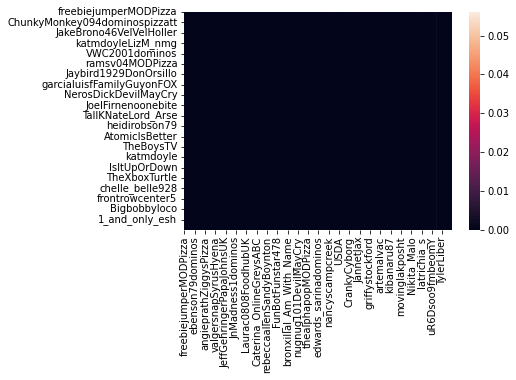

In [ ]:
sns.heatmap(np.log(df+1))

In [ ]:
betweenness_centrality = pd.Series(nx.betweenness_centrality(G)).sort_values()
betweenness_centrality

{'freebiejumperMODPizza': 0.0,
 'mssummer444Millions': 0.0,
 'mssummer444PapaJohnsUK': 0.0,
 'oreostansstuffKeystoneLightUS': 0.0,
 'twirlyswirl79IFM_Insurance': 0.0,
 'twirlyswirl79PizzaExpress': 0.0,
 'EDArtsAndDesignlittlecaesars': 0.0,
 'LiliL666m1313ColeTheBlackCat': 0.0,
 'oreostansstuffpeeweeherman': 0.0,
 'oreostansstuffGKIDSfilms': 0.0,
 'daleinhavasuMODPizza': 0.0,
 'WowWowWZNASCARONFOX': 0.0,
 'oreostansstuffFallonTonight': 0.0,
 'wandertrixMissguided': 0.0,
 'wandertrixDominos_UK': 0.0,
 'tinydancer10108MODPizza': 0.0,
 'CroninPeterdominos': 0.0,
 'Alecmorris30GregBaldwinIroh': 0.0,
 'BlackdogPodcastbioware': 0.0,
 'notguiltyatalldominos': 0.0,
 'catalyst_yuki_kNASAUniverse': 0.0,
 'tits_out4leviColeTheBlackCat': 0.0,
 'ChicagoCAPS18chicago': 0.0,
 'wandertrixjet2vibe': 0.0,
 'Bsbbs5BRIANMODPizza': 0.0,
 'CarolYMorrisse1ColeTheBlackCat': 0.0,
 'imanlachaidominos': 0.0,
 'RickinBaltimoreLedoPizza': 0.0,
 'oreostansstuffGregBaldwinIroh': 0.0,
 'oscar_oscar_10PapaJohnsUK': 0.0

extra?

In [22]:
G.add_nodes_from(['A',"B","C","D",'E'])
G.add_edges_from([('A','C'), ('B','D'), ('B','E'), ('C', 'E'),('A','E')])

In [23]:
import networkx as nx 
import matplotlib.pyplot as plt

In [24]:
G = nx.DiGraph(directed=True)

In [25]:
print(G.nodes()) # returns a list
print(G.edges()) # returns a list

[]
[]


In [26]:
G.add_nodes_from(['A',"B","C","D",'E'])
G.add_edges_from([('A','C'), ('B','D'), ('B','E'), ('C', 'E'),('A','E')])

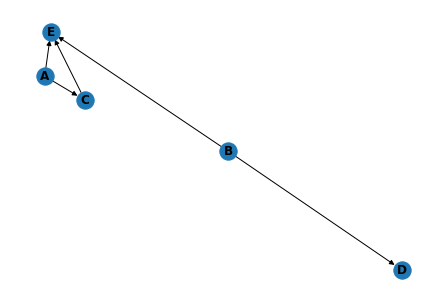

In [27]:
nx.draw(G, with_labels=True, font_weight='bold')
plt.show() 

In [ ]:
nx.betweenness_centrality(G)

In [29]:
E = [('A', 'B', 2), ('A', 'C', 1), ('B', 'D', 5), ('B', 'E', 3), ('C', 'E', 2)]
G.add_weighted_edges_from(E)

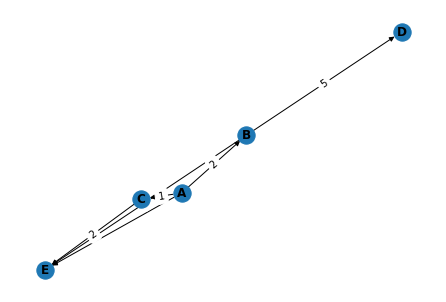

In [30]:
pos=nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, font_weight='bold')
edge_weight = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels = edge_weight)
plt.show()